# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/9_segmentation_models/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

# About the networks


1. UNet
  - https://arxiv.org/abs/1505.04597
  - https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47
  - https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5

2. FPN
  - http://openaccess.thecvf.com/content_cvpr_2017/papers/Lin_Feature_Pyramid_Networks_CVPR_2017_paper.pdf
  - https://towardsdatascience.com/review-fpn-feature-pyramid-network-object-detection-262fc7482610
  - https://medium.com/@jonathan_hui/understanding-feature-pyramid-networks-for-object-detection-fpn-45b227b9106c


3. PSPNet
  - https://arxiv.org/abs/1612.01105
  - https://towardsdatascience.com/review-pspnet-winner-in-ilsvrc-2016-semantic-segmentation-scene-parsing-e089e5df177d
  - https://developers.arcgis.com/python/guide/how-pspnet-works/


4. Linknet
  - https://arxiv.org/pdf/1707.03718.pdf
  - https://neptune.ai/blog/image-segmentation-tips-and-tricks-from-kaggle-competitions

# Monk Format

## Dataset Directory Structure

      root_dir
          |
          | 
          |         
          |----train_img_dir
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on) 
          |
          |----train_mask_dir
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)
          |
          |----val_img_dir (optional)
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)
          |
          |----val_mask_dir (optional)
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)

          
          

# Sample Dataset Credits

    credits: https://github.com/alexgkendall/SegNet-Tutorial

In [2]:
# Download the dataset
import os
DATA_DIR = './data/CamVid/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print('Loading data...')
    os.system('git clone https://github.com/alexgkendall/SegNet-Tutorial ./data')
    print('Done!')

# Training

In [1]:
import os
import sys
sys.path.append("../../9_segmentation_models/lib/");

In [2]:
from train_segmentation import Segmenter

Using TensorFlow backend.
/home/abhi/.virtualenvs/monk_obj_19_segmentation_models/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhi/.virtualenvs/monk_obj_19_segmentation_models/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhi/.virtualenvs/monk_obj_19_segmentation_models/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qi

Segmentation Models: using `keras` framework.


In [3]:
gtf = Segmenter();

In [4]:
img_dir = "data/CamVid/train";
mask_dir = "data/CamVid/trainannot";

In [1]:
classes_dict = {
    'sky': 0, 
    'building': 1, 
    'pole': 2, 
    'road': 3, 
    'pavement': 4, 
    'tree': 5, 
    'signsymbol': 6, 
    'fence': 7, 
    'car': 8, 
    'pedestrian': 9, 
    'bicyclist': 10, 
    'unlabelled': 11
};
classes_to_train = ['car'];

In [6]:
gtf.Train_Dataset(img_dir, mask_dir, classes_dict, classes_to_train)

In [7]:
img_dir = "data/CamVid/val";
mask_dir = "data/CamVid/valannot";

In [8]:
gtf.Val_Dataset(img_dir, mask_dir)

In [ ]:
gtf.List_Backbones();

In [9]:
gtf.Data_Params(batch_size=2, backbone="efficientnetb3")

In [ ]:
gtf.List_Models();

In [10]:
gtf.Model_Params(model="Unet")

In [11]:
gtf.Train_Params(lr=0.0001)

In [12]:
gtf.Setup();

Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.


In [13]:
gtf.Train(num_epochs=40);

Epoch 1/40
183/183 [==============================] - 74s 407ms/step - loss: 0.7639 - iou_score: 0.4043 - f1-score: 0.5270 - val_loss: 0.8117 - val_iou_score: 0.5583 - val_f1-score: 0.6785
Epoch 2/40
183/183 [==============================] - 44s 243ms/step - loss: 0.5191 - iou_score: 0.5901 - f1-score: 0.7126 - val_loss: 0.6673 - val_iou_score: 0.4825 - val_f1-score: 0.6126
Epoch 3/40
183/183 [==============================] - 44s 240ms/step - loss: 0.3490 - iou_score: 0.6714 - f1-score: 0.7803 - val_loss: 0.4782 - val_iou_score: 0.6529 - val_f1-score: 0.7515
Epoch 4/40
183/183 [==============================] - 44s 240ms/step - loss: 0.2929 - iou_score: 0.6948 - f1-score: 0.7984 - val_loss: 0.4226 - val_iou_score: 0.6063 - val_f1-score: 0.7153
Epoch 5/40
183/183 [==============================] - 43s 236ms/step - loss: 0.2426 - iou_score: 0.7283 - f1-score: 0.8246 - val_loss: 0.3489 - val_iou_score: 0.6284 - val_f1-score: 0.7413
Epoch 6/40
183/183 [==============================] - 4

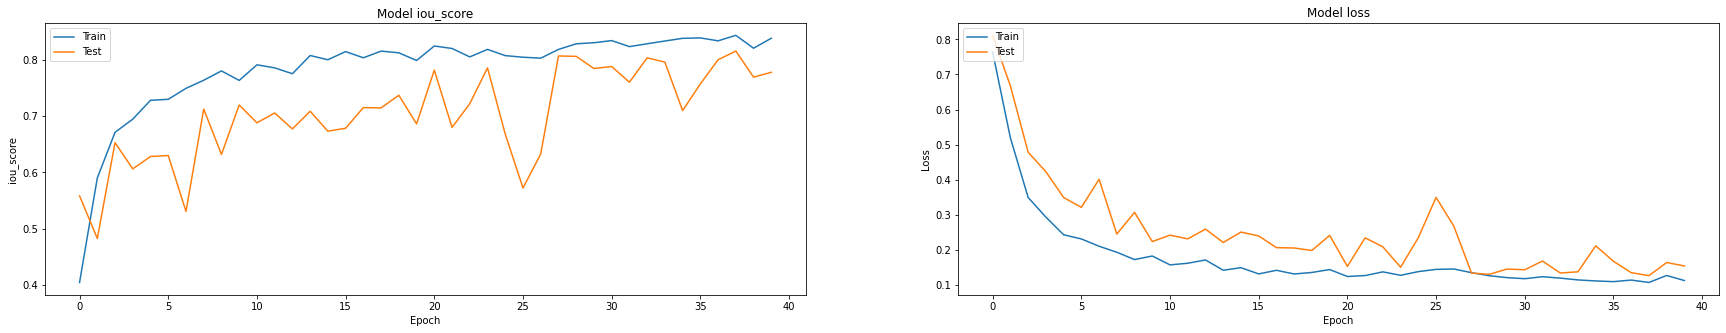

In [14]:
gtf.Visualize_Training_History();

# Inference

In [1]:
import os
import sys
sys.path.append("../../9_segmentation_models/lib/");

In [2]:
from infer_segmentation import Infer

Using TensorFlow backend.
/home/abhi/.virtualenvs/monk_obj_19_segmentation_models/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhi/.virtualenvs/monk_obj_19_segmentation_models/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhi/.virtualenvs/monk_obj_19_segmentation_models/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qi

Segmentation Models: using `keras` framework.


In [3]:
gtf = Infer();

In [4]:
classes_dict = {
    'sky': 0, 
    'building': 1, 
    'pole': 2, 
    'road': 3, 
    'pavement': 4, 
    'tree': 5, 
    'signsymbol': 6, 
    'fence': 7, 
    'car': 8, 
    'pedestrian': 9, 
    'bicyclist': 10, 
    'unlabelled': 11
};
classes_to_train = ['car'];

In [5]:
gtf.Data_Params(classes_dict, classes_to_train)

In [6]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='best_model.h5')

In [7]:
gtf.Setup();

Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.


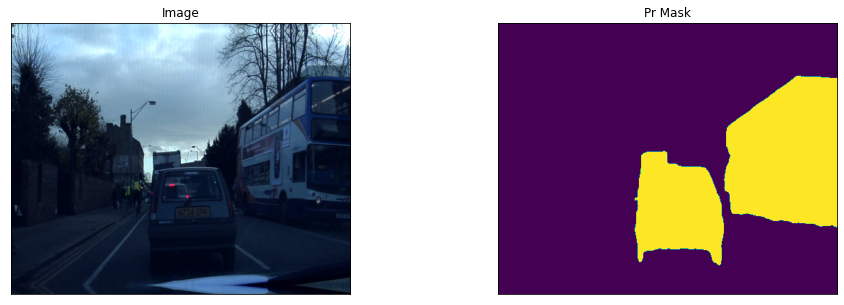

In [8]:
gtf.Predict("../sample_dataset/camvid_test/test1.png", vis=True);